# Fig 8

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
# color map
import matplotlib.cm as cm
from plotting import plot_confidence_interval
from utils import confidence_interval

In [24]:
data_root = Path("../data")

Note: make sure to run scripts/run_adk_bootstrapped_ml_titration.py first!

In [25]:
try:
    ml_titration_results = pd.read_csv(data_root / "bootstrapped_ml_titration_results.csv")
except FileNotFoundError:
    print("Please run the ml titration script first.")

Please run the ml titration script first.


In [26]:
ml_titration_results_agg = ml_titration_results.copy()
ml_titration_results_agg["model_target_feature"] = ml_titration_results_agg["model"] + "_" + ml_titration_results_agg["target"] + "_" + ml_titration_results_agg["feature"]
ml_titration_results_agg = ml_titration_results_agg.groupby(["model_target_feature", "train_size"]).agg({"spearman": ["mean", "std", confidence_interval]}).reset_index()
ml_titration_results_agg.columns = ["model_target_feature", "train_size", "mean_spearman", "std_spearman", "ci_spearman"]

## Protein NPT Results
___

In [27]:
pnpt_results = pd.read_csv(data_root / "pnpt_adenylate_kinase_detailed_results.csv")

In [28]:
pnpt_models = [
    "kinase_20240822_multi4_PNPT_Tranception",  
    "kinase_20240822_multi4_PNPT_ESM2",
    "kinase_20240822_multi4_Tranception",
    "kinase_20240822_multi4_ESM2"
]

In [29]:
pnpt_results_kcat = pnpt_results[pnpt_results["model_name_suffix"].isin(pnpt_models)][["Spearman_log10_kcat","fold_variable_name", "model_name_suffix"]].copy()
pnpt_results_kcat["train_size"] = pnpt_results_kcat["fold_variable_name"].apply(lambda x: int(x.split("_")[-1]))
pnpt_results_kcat = pnpt_results_kcat.groupby(["model_name_suffix", "train_size"]).agg({"Spearman_log10_kcat": ["mean", "std", confidence_interval]}).reset_index()
pnpt_results_kcat.columns = ["model_name_suffix", "train_size", "mean_spearman", "std_spearman", "95_CI"]

In [30]:
pnpt_results_km = pnpt_results[pnpt_results["model_name_suffix"].isin(pnpt_models)][["Spearman_log10_km","fold_variable_name", "model_name_suffix"]].copy()
pnpt_results_km["train_size"] = pnpt_results_km["fold_variable_name"].apply(lambda x: int(x.split("_")[-1]))
pnpt_results_km = pnpt_results_km.groupby(["model_name_suffix", "train_size"]).agg({"Spearman_log10_km": ["mean", "std", confidence_interval]}).reset_index()
pnpt_results_km.columns = ["model_name_suffix", "train_size", "mean_spearman", "std_spearman", "95_CI"]

In [31]:
colors = cm.viridis(np.linspace(0, 1, 4))

In [32]:
DLKCAT_SPEARMAN = -0.09 
TRANCEPTION_KCAT_SPEARMAN = .2387
TRANCEPTION_KM_SPEARMAN = 0.0747

## kcat plot
___

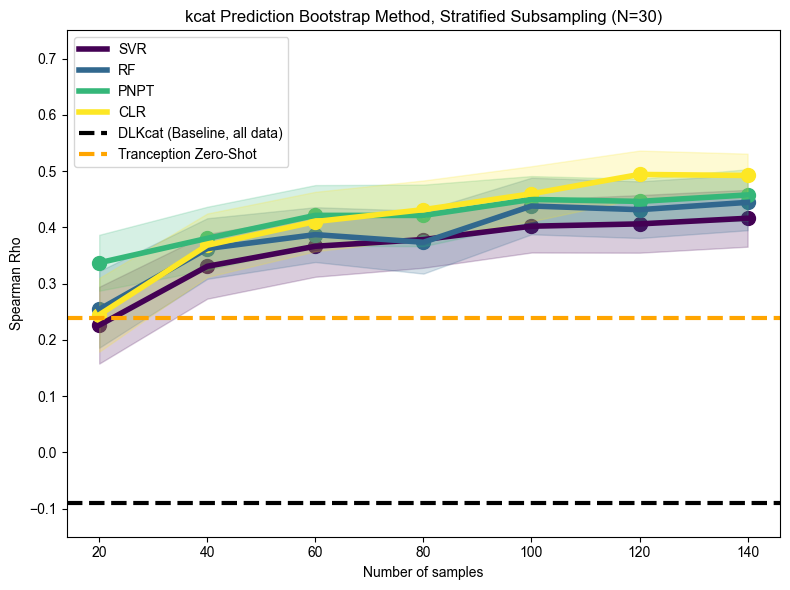

In [33]:
fig, ax = plt.subplots(figsize=(8,6))

# plot SVR one-hot
svr_one_hot_kcat = ml_titration_results_agg[ml_titration_results_agg["model_target_feature"] == "SVR_log10_kcat_one-hot"]
plot_confidence_interval(ax=ax, x=svr_one_hot_kcat["train_size"], 
                         y_mean=svr_one_hot_kcat["mean_spearman"],
                         y_ci=svr_one_hot_kcat["ci_spearman"], 
                         label="SVR", color=colors[0])

# plot RF ESM
rf_esm_kcat = ml_titration_results_agg[ml_titration_results_agg["model_target_feature"] == "RF_log10_kcat_esm"]
plot_confidence_interval(ax=ax, x=rf_esm_kcat["train_size"], 
                         y_mean=rf_esm_kcat["mean_spearman"],
                         y_ci=rf_esm_kcat["ci_spearman"],
                         label="RF", color=colors[1])

# plot PNPT
pnpt_kcat = pnpt_results_kcat[pnpt_results_kcat["model_name_suffix"] == "kinase_20240822_multi4_PNPT_Tranception"]
plot_confidence_interval(ax=ax, x=pnpt_kcat["train_size"],
                         y_mean=pnpt_kcat["mean_spearman"],
                         y_ci=pnpt_kcat["95_CI"],
                         label="PNPT", color=colors[2])
                         
# plot CLR
clr_kcat = pnpt_results_kcat[pnpt_results_kcat["model_name_suffix"] == "kinase_20240822_multi4_Tranception"]
plot_confidence_interval(ax=ax, x=clr_kcat["train_size"],
                         y_mean=clr_kcat["mean_spearman"],
                         y_ci=clr_kcat["95_CI"],
                         label="CLR", color=colors[3])





ax.axhline(y=DLKCAT_SPEARMAN, color='black', linestyle='--',linewidth=3, label="DLKcat (Baseline, all data)")
ax.axhline(y=TRANCEPTION_KCAT_SPEARMAN, color="orange", linestyle='--', linewidth=3, label="Tranception Zero-Shot")
ax.set_xlabel("Number of samples")
ax.set_ylabel("Spearman Rho")
ax.set_ylim(-0.15,0.75)
ax.legend()
ax.set_title("kcat Prediction Bootstrap Method, Stratified Subsampling (N=30)")
plt.tight_layout()
plt.show()


## km plot

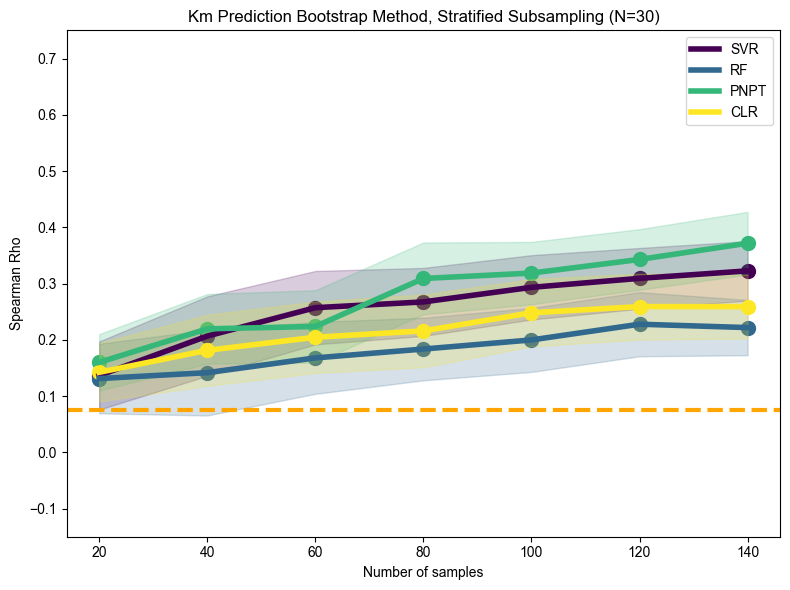

In [34]:
#ALPHA = 0.2
# same as above but with confidence intervals shaded
fig, ax = plt.subplots(figsize=(8,6))

# plot SVR one-hot
svr_one_hot_km = ml_titration_results_agg[ml_titration_results_agg["model_target_feature"] == "SVR_log10_km_one-hot"]
plot_confidence_interval(ax=ax, x=svr_one_hot_km["train_size"], 
                         y_mean=svr_one_hot_km["mean_spearman"],
                         y_ci=svr_one_hot_km["ci_spearman"], 
                         label="SVR", color=colors[0])
# plot RF ESM
rf_esm_km = ml_titration_results_agg[ml_titration_results_agg["model_target_feature"] == "RF_log10_km_esm"]
plot_confidence_interval(ax=ax, x=rf_esm_km["train_size"], 
                         y_mean=rf_esm_km["mean_spearman"],
                         y_ci=rf_esm_km["ci_spearman"],
                         label="RF", color=colors[1])
# plot PNPT
pnpt_km = pnpt_results_km[pnpt_results_km["model_name_suffix"] == "kinase_20240822_multi4_PNPT_Tranception"]
plot_confidence_interval(ax=ax, x=pnpt_km["train_size"],
                         y_mean=pnpt_km["mean_spearman"],
                         y_ci=pnpt_km["95_CI"],
                         label="PNPT", color=colors[2])
# plot CLR
clr_km = pnpt_results_km[pnpt_results_km["model_name_suffix"] == "kinase_20240822_multi4_Tranception"]
plot_confidence_interval(ax=ax, x=clr_km["train_size"],
                         y_mean=clr_km["mean_spearman"],
                         y_ci=clr_km["95_CI"],
                         label="CLR", color=colors[3])

ax.set_xlabel("Number of samples")
ax.set_ylabel("Spearman Rho")
ax.set_ylim(-0.15,0.75)
ax.legend()
ax.set_title("Km Prediction Bootstrap Method, Stratified Subsampling (N=30)")
ax.axhline(y=TRANCEPTION_KM_SPEARMAN, color='orange', linestyle='--',linewidth=3, label="Tranception Zero-Shot")
plt.tight_layout()
plt.show()

# Scatter kcat and Km rho for largest dataset size

In [35]:
all_embedding_pnpt_results = pnpt_results[["Spearman_log10_kcat", "Spearman_log10_km","fold_variable_name", "model_name_suffix"]].copy()
all_embedding_pnpt_results["train_size"] = all_embedding_pnpt_results["fold_variable_name"].apply(lambda x: int(x.split("_")[-1]))
all_embedding_pnpt_results["cleaned_model_name"] = all_embedding_pnpt_results["model_name_suffix"].apply(lambda x: "_".join(x.split("_")[2:]))
all_embedding_pnpt_results.drop(columns=["model_name_suffix"], inplace=True)
all_embedding_pnpt_results = all_embedding_pnpt_results[(all_embedding_pnpt_results["train_size"] == 140) 
                                                        & ((all_embedding_pnpt_results["cleaned_model_name"].str.contains("multi4") | all_embedding_pnpt_results["cleaned_model_name"].str.contains("single")))]
all_embedding_pnpt_results = all_embedding_pnpt_results.groupby(["cleaned_model_name"]).agg({"Spearman_log10_kcat": ["mean"], "Spearman_log10_km": ["mean"]}).reset_index()
all_embedding_pnpt_results.columns = ["model_name", "kcat_mean_spearman", "Km_mean_spearman"]

In [36]:
ml_agg_results_140 = ml_titration_results_agg[ml_titration_results_agg["train_size"] == 140].copy()

In [37]:
kcat_pnpt_results_140 = {
    "multi_CLR_ESM2":	all_embedding_pnpt_results[all_embedding_pnpt_results["model_name"] == "multi4_ESM2"]["kcat_mean_spearman"].values[0],
    "multi_PNPT_ESM2":	all_embedding_pnpt_results[all_embedding_pnpt_results["model_name"] == "multi4_PNPT_ESM2"]["kcat_mean_spearman"].values[0],
    "multi_PNPT_MSAT":	all_embedding_pnpt_results[all_embedding_pnpt_results["model_name"] == "multi4_PNPT_MSAT"]["kcat_mean_spearman"].values[0],
    "multi_PNPT_Tranception":	all_embedding_pnpt_results[all_embedding_pnpt_results["model_name"] == "multi4_PNPT_Tranception"]["kcat_mean_spearman"].values[0],
    "multi_CLR_Tranception":	all_embedding_pnpt_results[all_embedding_pnpt_results["model_name"] == "multi4_Tranception"]["kcat_mean_spearman"].values[0],
    "single_CLR_ESM2":	all_embedding_pnpt_results[all_embedding_pnpt_results["model_name"] == "single_ESM2"]["kcat_mean_spearman"].values[0],
    "single_PNPT_Tranception":	all_embedding_pnpt_results[all_embedding_pnpt_results["model_name"] == "single_kcat_PNPT_Tranception"]["kcat_mean_spearman"].values[0],
    "single_CLR_Tranception":	all_embedding_pnpt_results[all_embedding_pnpt_results["model_name"] == "single_kcat_Tranception"]["kcat_mean_spearman"].values[0],
    "single_RF_OHE": ml_agg_results_140[ml_agg_results_140["model_target_feature"] == "RF_log10_kcat_one-hot"]["mean_spearman"].values[0],
    "single_SVR_OHE": ml_agg_results_140[ml_agg_results_140["model_target_feature"] == "SVR_log10_kcat_one-hot"]["mean_spearman"].values[0],
    "single_RF_ESM2": ml_agg_results_140[ml_agg_results_140["model_target_feature"] == "RF_log10_kcat_esm"]["mean_spearman"].values[0],
    "single_SVR_ESM2": ml_agg_results_140[ml_agg_results_140["model_target_feature"] == "SVR_log10_kcat_esm"]["mean_spearman"].values[0],
}

km_pnpt_results_140 = {
    "multi_CLR_ESM2":	all_embedding_pnpt_results[all_embedding_pnpt_results["model_name"] == "multi4_ESM2"]["Km_mean_spearman"].values[0],
    "multi_PNPT_ESM2":	all_embedding_pnpt_results[all_embedding_pnpt_results["model_name"] == "multi4_PNPT_ESM2"]["Km_mean_spearman"].values[0],
    "multi_PNPT_MSAT":	all_embedding_pnpt_results[all_embedding_pnpt_results["model_name"] == "multi4_PNPT_MSAT"]["Km_mean_spearman"].values[0],
    "multi_PNPT_Tranception":	all_embedding_pnpt_results[all_embedding_pnpt_results["model_name"] == "multi4_PNPT_Tranception"]["Km_mean_spearman"].values[0],
    "multi_CLR_Tranception":	all_embedding_pnpt_results[all_embedding_pnpt_results["model_name"] == "multi4_Tranception"]["Km_mean_spearman"].values[0],
    "single_CLR_ESM2":	all_embedding_pnpt_results[all_embedding_pnpt_results["model_name"] == "single_km_ESM2"]["Km_mean_spearman"].values[0],
    "single_PNPT_Tranception":	all_embedding_pnpt_results[all_embedding_pnpt_results["model_name"] == "single_km_PNPT_Tranception"]["Km_mean_spearman"].values[0],
    "single_CLR_Tranception":	all_embedding_pnpt_results[all_embedding_pnpt_results["model_name"] == "single_km_Tranception"]["Km_mean_spearman"].values[0],
    "single_RF_OHE": ml_agg_results_140[ml_agg_results_140["model_target_feature"] == "RF_log10_km_one-hot"]["mean_spearman"].values[0],
    "single_SVR_OHE": ml_agg_results_140[ml_agg_results_140["model_target_feature"] == "SVR_log10_km_one-hot"]["mean_spearman"].values[0],
    "single_RF_ESM2": ml_agg_results_140[ml_agg_results_140["model_target_feature"] == "RF_log10_km_esm"]["mean_spearman"].values[0],
    "single_SVR_ESM2": ml_agg_results_140[ml_agg_results_140["model_target_feature"] == "SVR_log10_km_esm"]["mean_spearman"].values[0],
}

In [38]:
architecure_color_dict = {
    "CLR": colors[3],
    "PNPT": colors[2],
    "RF": colors[1],
    "SVR": colors[0],
}

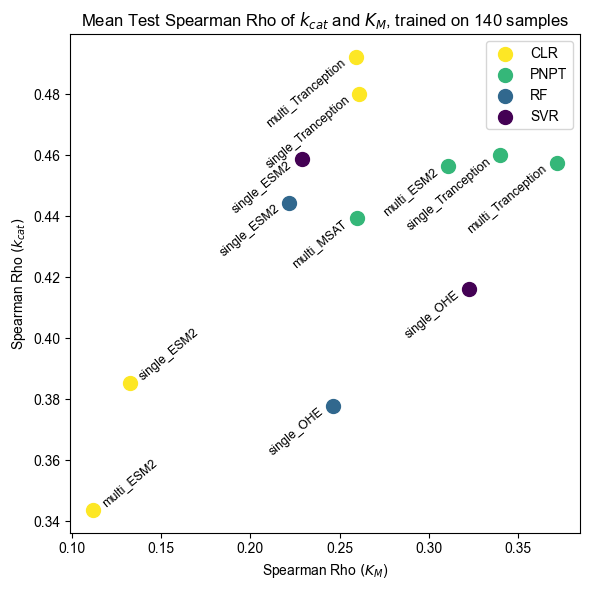

In [39]:
plt.rcParams["font.family"] = "Arial"

fig, ax = plt.subplots(figsize=(6, 6))

ROTATION = 40
X_OFFSET = 0.004
Y_OFFSET = 0.000
legend_labels = set()
for key in km_pnpt_results_140.keys():

    label = key.split("_")[1]
    annotation = key.split("_")[0] + "_" + key.split("_")[-1]
    #annotation = key.split("_")[-1]


    ax.scatter(km_pnpt_results_140[key], kcat_pnpt_results_140[key], 
               label=label if label not in legend_labels else "__nolabel__",
                 s=100, color=architecure_color_dict[key.split("_")[1]],
                 #marker="^" if "multi" in key else "o",
                 #edgecolor="black", linewidth=1.5,
                 ) 
    if label not in legend_labels:
        legend_labels.add(label)

    
    if (kcat_pnpt_results_140[key] < 0.4) & (km_pnpt_results_140[key] < 0.2):
        ax.annotate(annotation, 
                    (km_pnpt_results_140[key]+X_OFFSET, kcat_pnpt_results_140[key]+Y_OFFSET),
                      ha='left', va="bottom", rotation=ROTATION,
                      fontsize=9,
                     )
    else:
        ax.annotate(annotation, (km_pnpt_results_140[key]-X_OFFSET, kcat_pnpt_results_140[key]-Y_OFFSET),
                     ha='right', va="top", rotation=ROTATION,
                     fontsize=9)
  
ax.set_xlabel("Spearman Rho $(K_{M}$)")
ax.set_ylabel("Spearman Rho $(k_{cat})$")
ax.set_title("Mean Test Spearman Rho of $k_{cat}$ and $K_{M}$, trained on 140 samples")
ax.legend()
plt.tight_layout()
plt.show()